In [137]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


G:\anaconda\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['e', 'beta']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [138]:
beta = 0.95 #瞬时重量系数,飞行中飞机重量m 与起飞重量m0 之比
alpha = 0.2 # 飞行中发动机安装推力与海平面静推力F0之比
k_TO = 1.5 #起飞安全速度系数
S_G = 1200 #起飞滑跑距离
rho = 1.29 
C_lmax = 1.5
C_d0 = 0.015 #零升阻力系数
g = 9.8 #重力加速度
k1 = 0.06 #阻力极曲线方程中的二次项系数
k2 = 0 #阻力极曲线方程中的一次项系数
v = 250
q = 0.5*rho*v**2
x = linspace(100,500,2000) #翼载荷
Ma = 0.85

## 起飞滑跑约束

In [139]:
# T为推重比
T1 = beta**2/alpha*k_TO**2/(S_G*rho*C_Lmax)*x

## 爬升率约束

In [140]:
c_rate = 10 #爬升率

In [141]:
T2 = beta/alpha*(k1*beta*g/q*x+k2+C_d0*q/beta/g/x+c_rate/v)

## 最大马赫数约束

In [142]:
T3 = beta/alpha*(k1*beta*g/q*x+k2+C_d0*q/beta/g/x)

## 水平加减速约束

In [143]:
a = 0.5 #加速度

In [144]:
T4 = beta/alpha*(k1*beta*g/q*x+k2+C_d0*q/rho/g/x+a/g)

## 持续盘旋过载约束

In [145]:
n = 5 #最大过载
T5 = beta/alpha*(k1*n**2*beta*g/q*x+k2*n+C_d0*q/beta/g/x)

## 升限约束

In [146]:
dh = 10 #爬升率

In [147]:
T6 = beta/alpha*(k1*beta*g/q*x+k2+C_d0*q/beta/g/x+dh/v)

## 着陆滑跑距离约束

In [148]:
mu = 0.1 #着陆摩擦系数
x_ap = 2000 #着陆滑跑距离
k_td = 1.5 #安全速度系数

In [149]:
x0 = x_ap*rho*C_lmax*mu/k_td**2/beta

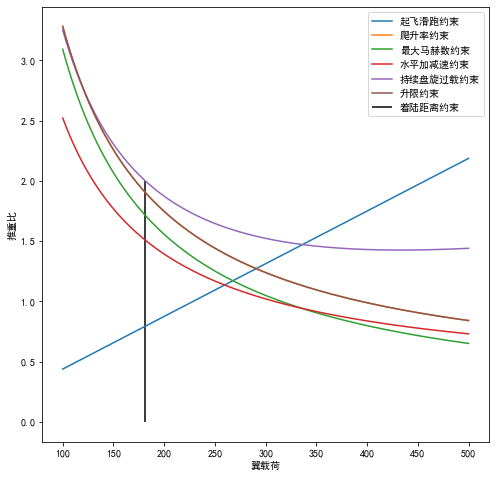

In [150]:
import seaborn as sns
import matplotlib as mpl

mpl.rcParams['font.sans-serif'] = ['SimHei']  
mpl.rcParams['axes.unicode_minus'] = False  
figure(figsize = (8,8))
plot(x,T1, label = "起飞滑跑约束")
plot(x,T2, label = "爬升率约束")
plot(x,T3, label = "最大马赫数约束")
plot(x,T4, label = "水平加减速约束")
plot(x,T5, label = "持续盘旋过载约束")
plot(x,T6, label = "升限约束")
vlines(x0,0,2, label = "着陆距离约束")
xlabel('翼载荷')
ylabel("推重比")
legend()

## 气动特性初步估计

In [151]:
A = 8 #展弦比
A0 = pi/9 #前缘后掠角
e = 4.61*(1-0.045*A**0.68)*cos(A0)**0.15-3.1 #奥斯瓦尔德系数
k1 = 1/pi/A/e
k1

0.0639709645836725

## 初步重量估计

In [152]:
m_crew = 1 #成员质量
m_PL = 1 #有效载荷
m_F = 1 #燃油
m_E = 1 #空机质量

In [153]:
m_0 = m_crew+m_PL+m_F+m_E

空机重量比经验统计公式

In [155]:
a = 1
b = 1
c1 = 1
c2 = 1
c3 = 1
c4 = 1
c5 = 1
K_vs = 1 #可变后掠常数
F_0 = 1 #推力
S = 1 #翼面积

In [156]:
# 喷气式飞机
mEm0 = (a+b*(m_0/0.4536)**c1*A**c2*(F_0/m_0/g)**c3*(0.2048*m_0/S)*Ma*c5)*K_vs

## 燃油重量比估计

In [157]:
m1m0 = 0.99 #暖机起飞
m2m1 = 0.99 #爬升和水平加速

LD = 1/(q*C_d0*S/beta/m_0/g+k1*beta*m_0*g/q/S) #升阻比
R = 10000 #航程(km)
V = 300 #速度(m/s)
C = 1 #单位耗油率
m3m2 = exp(-1000*g*R*C/LD) #巡航

E = 1
m4m3 = exp(-3600*g*E*C/LD) #待机

m5m4 = 0.99 #着陆

In [158]:
mFm0 = 1.06*(1-m1m0*m2m1*m3m2*m4m3*m5m4)

In [ ]:
m_0_tem = (m_crew+m_PL)/(1-mFm0-mEm0)

while abs(1-m_0_tem/m_0)>0.5:
    m_0 = m_0_tem
    mEm0 = (a+b*(m_0/0.4536)**c1*A**c2*(F_0/m_0/g)**c3*(0.2048*m_0/S)*Ma*c5)*K_vs
    m_0_tem = (m_crew+m_PL)/(1-mFm0-mEm0)
    print(m_0_tem)

print(m_0)
